In [3]:
import numpy as np
import pandas as pd
import segyio
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.linear_model import LinearRegression
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import scipy as sp
from functions.analysis_functions import traces_cut
from functions.analysis_functions import window_smooth
from functions.analysis_functions import spectrum
from functions.analysis_functions import Q_calculate

**Контакты**  
Василенко Никита Константинович  
vasilenkonikita.1997@mail.ru  
8-913-373-94-00  

# Theory

Основная теория для скрипта описана в папке Theory. Предположительно, на данном участке профиля присутствует газовая шапка.  
***Задача*** : расчет показателя обратной добротности для морского профиля.  
***Данные*** : профиль морской сейсморазведки. 3 предположительных горизонта, выделенных в Petrel.  
***Результат*** : Получены оценки поглощения между 3 горизонтами. Посчитаны трендовые кривые.  

## Read data

In [5]:
segyname = 'data/avrg_200.sgy'
seis = segyio.open(segyname, mode='r+', ignore_geometry=True)
traces = []
for i in range(seis.tracecount):
    traces.append(seis.trace[i])
traces = np.stack(traces)

In [6]:
hor1 = np.load('data/hor1.npy')
hor2 = np.load('data/hor2.npy')
hor3 = np.load('data/hor3.npy')

### Boundaries for signal in time domain

In [7]:
left_boundary = 20
right_boundary = 30

### Boundaries for signal in frequency domain

In [8]:
f1 = 20
f2 = 80

### Cut sugnal and picture it

In [9]:
signal_cut1 = traces_cut(traces, hor1, left_boundary, right_boundary, 4)
signal_cut2 = traces_cut(traces, hor2, left_boundary, right_boundary, 4)
signal_cut3 = traces_cut(traces, hor3, left_boundary, right_boundary, 4)

Text(0, 0.5, 'Время, мс')

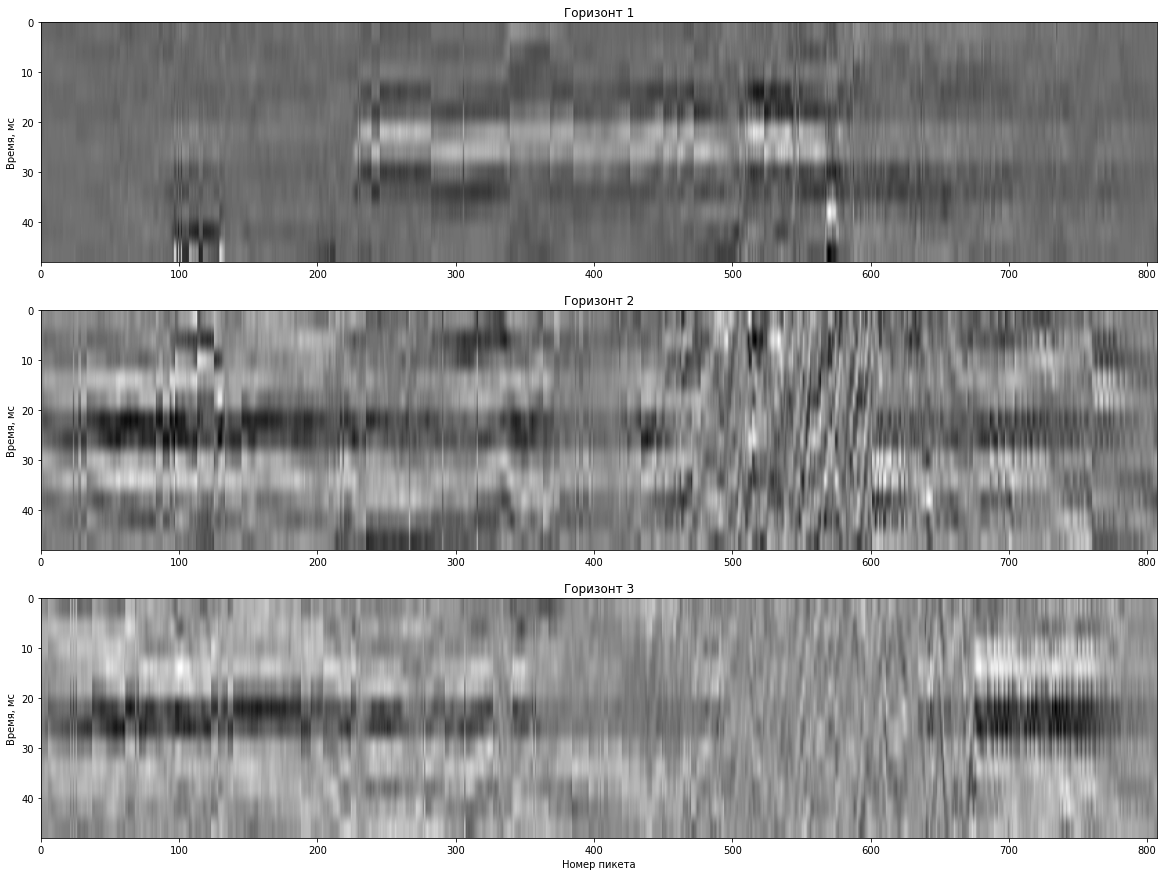

In [10]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(20)
for k, signal in enumerate([signal_cut1, signal_cut2, signal_cut3]):
    axs[k].imshow(signal.T, aspect='auto', extent=[0,len(signal),len(signal[0])*4,0], cmap='binary')
axs[0].title.set_text('Горизонт 1')
axs[1].title.set_text('Горизонт 2')
axs[2].title.set_text('Горизонт 3')
axs[2].set_xlabel('Номер пикета')
axs[0].set_ylabel('Время, мс')
axs[1].set_ylabel('Время, мс')
axs[2].set_ylabel('Время, мс')

### Smooth signals

In [11]:
smoothed1 = window_smooth(signal_cut1, 4, 8)
smoothed2 = window_smooth(signal_cut2, 4, 8)
smoothed3 = window_smooth(signal_cut3, 4, 8)

Points in signal to smooth -  4
Points in signal to smooth -  4
Points in signal to smooth -  4


### Spectrum

In [12]:
amplitudes1 = spectrum(smoothed1, calc_long=True)
amplitudes2 = spectrum(smoothed2, calc_long=True)
amplitudes3 = spectrum(smoothed3, calc_long=True)

Text(0, 0.5, 'Частота, Hz')

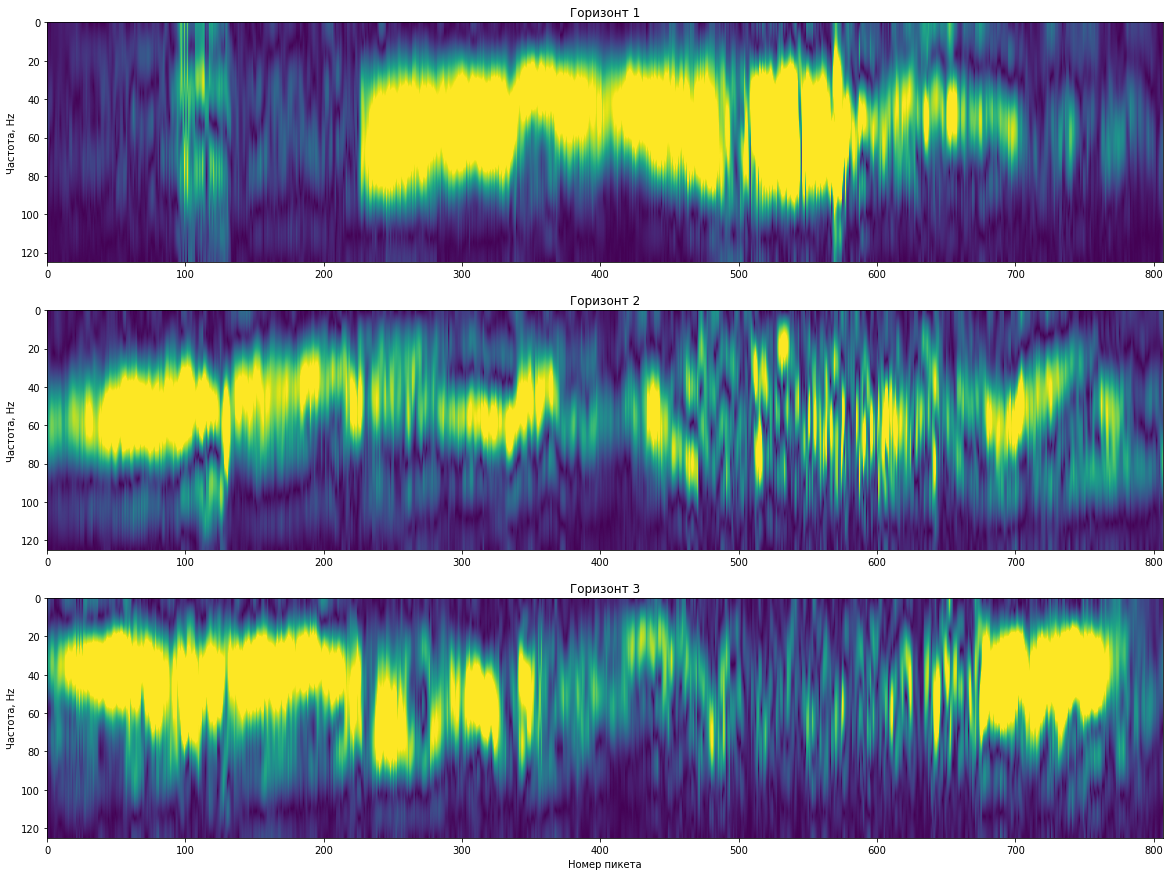

In [13]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(20)
for k, spec in enumerate([amplitudes1, amplitudes2, amplitudes3]):
    axs[k].imshow(spec.T, vmax=4, aspect='auto', extent=[0,len(spec),125,0])
axs[0].title.set_text('Горизонт 1')
axs[1].title.set_text('Горизонт 2')
axs[2].title.set_text('Горизонт 3')
axs[2].set_xlabel('Номер пикета')
axs[0].set_ylabel('Частота, Hz')
axs[1].set_ylabel('Частота, Hz')
axs[2].set_ylabel('Частота, Hz')

### Q calculation

In [14]:
t1, t2, t3 = 0.2, 0.6, 0.8 # time between waves

In [15]:
Q1_2 = Q_calculate(amplitudes1, amplitudes2, 20, 90, t1, 4)
Q2_3 = Q_calculate(amplitudes2, amplitudes3, 10, 90, t2, 4)
Q1_3 = Q_calculate(amplitudes1, amplitudes3, 10, 90, t3, 4)

Text(0, 0.5, 'Обратная добростность')

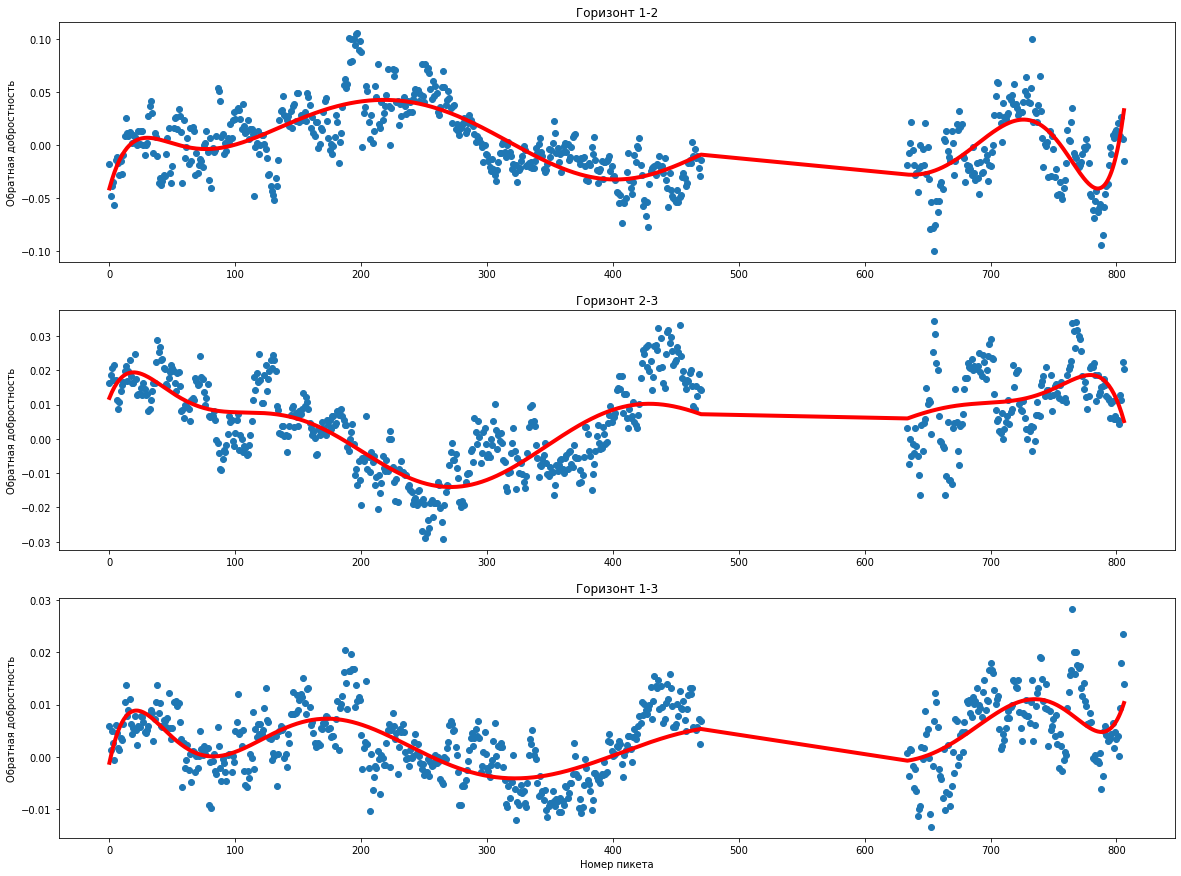

In [16]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(20)

for ind, Q in enumerate([Q1_2, Q2_3, Q1_3]):
    axs[ind].scatter(np.arange(0, len(Q),1)[(hor2<700) & (hor3<1300)], Q[(hor2<700) & (hor3<1300)])
    fp = np.polyfit(np.arange(0, 807,1), Q, 11)
    f = sp.poly1d(fp)
    axs[ind].plot(np.arange(0, 807,1)[(hor2<700) & (hor3<1300)], f(np.arange(0, 807,1))[(hor2<700) & (hor3<1300)], color='r', linewidth=4)
axs[0].title.set_text('Горизонт 1-2')
axs[1].title.set_text('Горизонт 2-3')
axs[2].title.set_text('Горизонт 1-3')
axs[2].set_xlabel('Номер пикета')
axs[0].set_ylabel('Обратная добростность')
axs[1].set_ylabel('Обратная добростность')
axs[2].set_ylabel('Обратная добростность')

### Single example

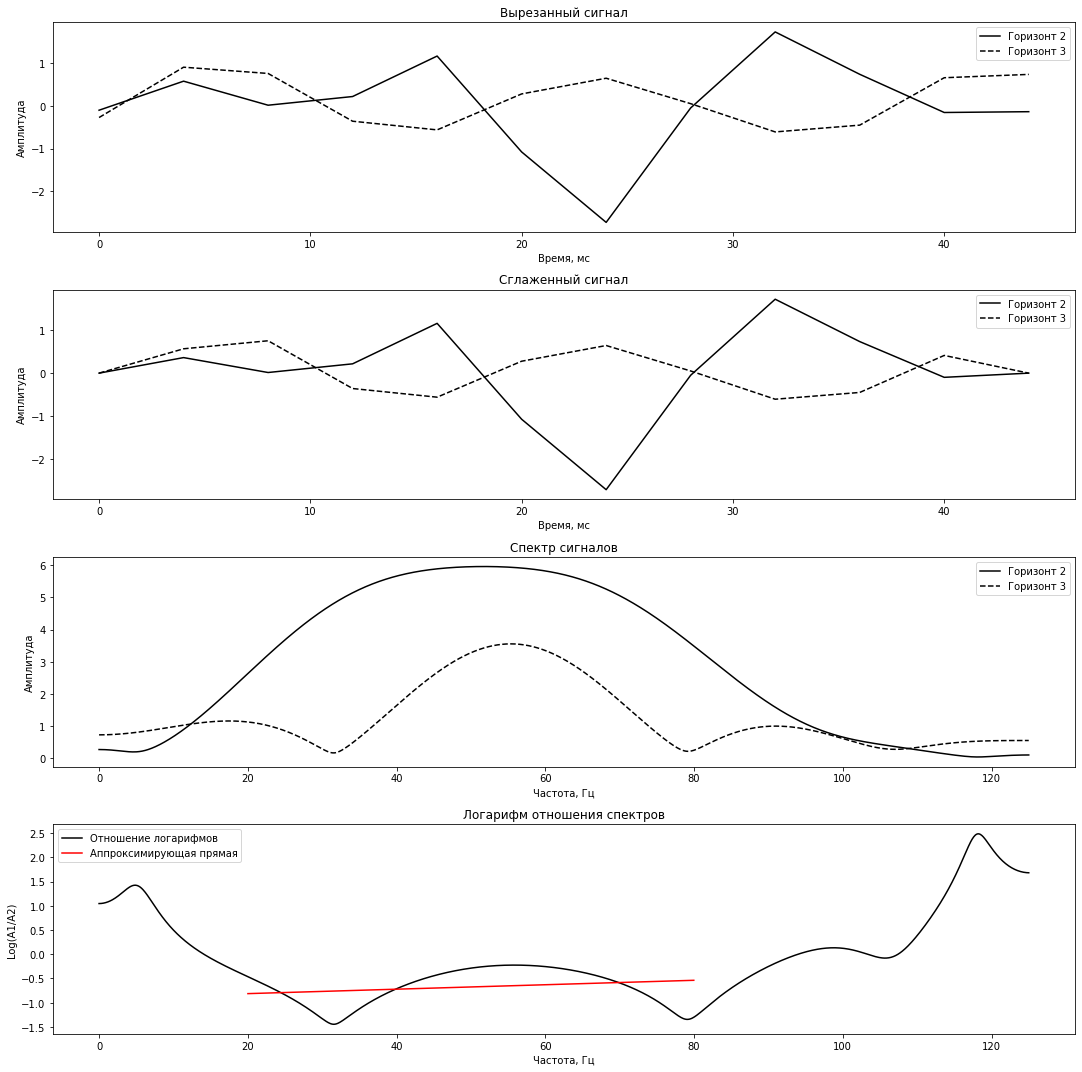

In [17]:
fig, axs = plt.subplots(4)
fig.set_figheight(15)
fig.set_figwidth(15)
num_of_trace = 300

axs[0].plot(np.arange(0,len(signal_cut1[0])*4,4), signal_cut1[num_of_trace], color='k', label='Горизонт 2')
axs[0].plot(np.arange(0,len(signal_cut2[0])*4,4), signal_cut2[num_of_trace], color='k', linestyle='dashed', label='Горизонт 3')

axs[1].plot(np.arange(0,len(smoothed1[0])*4,4), smoothed1[num_of_trace], color='k', label='Горизонт 2')
axs[1].plot(np.arange(0,len(smoothed2[0])*4,4), smoothed2[num_of_trace], color='k', linestyle='dashed', label='Горизонт 3')
axs[2].plot(np.linspace(0,125,1250), amplitudes1[num_of_trace], color='k', label='Горизонт 2')
axs[2].plot(np.linspace(0,125,1250), amplitudes2[num_of_trace], color='k', linestyle='dashed', label='Горизонт 3')
axs[3].plot(np.linspace(0,125,1250), np.log(amplitudes2[num_of_trace]/amplitudes1[num_of_trace]+0.2), color='k', label='Отношение логарифмов')
X = np.linspace(0,125,1250)[(np.linspace(0,125,1250) > 20) & (np.linspace(0,125,1250) <80)]
y = (np.log(amplitudes2[num_of_trace]/amplitudes1[num_of_trace]+0.2))[(np.linspace(0,125,1250) > 20) & (np.linspace(0,125,1250) <80)]
axs[3].plot(X, LinearRegression().fit(X.reshape(-1, 1), y).predict(X.reshape(-1,1)), color='r', label='Аппроксимирующая прямая')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].title.set_text('Вырезанный сигнал')
axs[0].set_xlabel('Время, мс')
axs[0].set_ylabel('Амплитуда')
axs[1].set_xlabel('Время, мс')
axs[1].set_ylabel('Амплитуда')
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[3].set_xlabel('Частота, Гц')
axs[3].set_ylabel('Log(A1/A2)')
axs[1].title.set_text('Сглаженный сигнал')
axs[2].title.set_text('Спектр сигналов')
axs[3].title.set_text('Логарифм отношения спектров')
fig.tight_layout()